# **Colab Connection**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!mkdir -p drive
!ls

drive  sample_data


In [ ]:
import os
os.chdir("/content/drive/My Drive/DeepLearning/Applications/BuildingConcreteSurfaceCrack/")
!pwd

/content/drive/My Drive/DeepLearning/Applications/BinaBetonCatlagi


# **Libraries and Dataset**

In [ ]:
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
np.random.seed(11) # It's my lucky number
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
import itertools

import keras
from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalAveragePooling2D, BatchNormalization, Add
from keras import backend as K
from keras.layers.normalization import batch_normalization
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.optimizers import Adam, RMSprop, Adamax, Nadam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.applications import Xception, VGG16, VGG19, ResNet50, ResNet101, ResNet152, InceptionV3, InceptionResNetV2
from tensorflow.keras.applications import MobileNet, MobileNetV2, DenseNet121, DenseNet169, DenseNet201, NASNetMobile, NASNetLarge
from tensorflow.keras.applications import EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7
import torchvision.models as models
from keras import backend as K
from keras.engine.input_layer import Input

import sys
sys.path.append('..')
import Functions as fn

In [ ]:
x_train = fn.np.load('Datasets/x_train.npy')
y_train = fn.np.load('Datasets/y_train.npy')
x_val = fn.np.load('Datasets/x_val.npy')
y_val = fn.np.load('Datasets/y_val.npy')
x_test = fn.np.load('Datasets/x_test.npy')
y_test = fn.np.load('Datasets/y_test.npy')

print("----------")
print("x_train.shape: ", x_train.shape, ", y_train.shape: ", y_train.shape)
print("x_val.shape: ", x_val.shape, ", y_val.shape: ", y_val.shape)
print("x_test.shape: ", x_test.shape, ", y_test.shape: ", y_test.shape)

----------
x_train.shape:  (28000, 96, 96, 3) , y_train.shape:  (28000, 2)
x_val.shape:  (6000, 96, 96, 3) , y_val.shape:  (6000, 2)
x_test.shape:  (6000, 96, 96, 3) , y_test.shape:  (6000, 2)


In [ ]:
print("----- y_train -----")
say = 0
for j in range(0, 2):
    for i in range(0, len(y_train)):
        if(y_train[i][j] == 1):
            say = say + 1
    print(str(j) + ": " + str(say))
    say = 0

print("----- y_val -----")
say = 0
for j in range(0, 2):
    for i in range(0, len(y_val)):
        if(y_val[i][j] == 1):
            say = say + 1
    print(str(j) + ": " + str(say))
    say = 0

print("----- y_test -----")
say = 0
for j in range(0, 2):
    for i in range(0, len(y_test)):
        if(y_test[i][j] == 1):
            say = say + 1
    print(str(j) + ": " + str(say))
    say = 0

----- y_train -----
0: 14000
1: 14000
----- y_val -----
0: 3000
1: 3000
----- y_test -----
0: 3000
1: 3000


In [ ]:
input_shape = (fn.boy, fn.en, fn.kanal)
model_input = Input(shape=input_shape)
epochs = 10
batch_size = 32

# **1) KerasApplications - TransferLearning ("PartialLayerFreezing")**

### **1) Xception**

In [ ]:
#Transfer Learning
#----------------
transfer_model = Xception(
    include_top=False,
    weights='imagenet',
    input_tensor=model_input
    )

#Partial Layer Freezing
for layer in transfer_model.layers:
  layer.trainable = False

new_model = transfer_model.output
new_model = GlobalAveragePooling2D()(new_model)
new_model = Dense(2, activation='sigmoid')(new_model)

#Combine Models
model = Model(inputs=transfer_model.input, outputs=new_model)
model.summary()
#----------------
#Transfer Learning


print("Train: ", x_train.shape, ", Val: ", x_val.shape, ", Test: ", x_test.shape)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss="binary_crossentropy",
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose=1,
                    validation_data=(x_val, y_val)
                   )

model.save('ModelTrainingResults/BuildingConcreteSurfaceCrack_Xception.h5')
fn.np.save('ModelTrainingResults/BuildingConcreteSurfaceCrack_Xception.npy', history.history)

83683744/83683744 [==============================] - 5s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 block1_conv1 (Conv2D)          (None, 47, 47, 32)   864         ['input_1[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 47, 47, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                                                                                                  
 block1_conv1_act (Activation

In [ ]:
print("[INFO] Calculating model accuracy")
print("Test Dataset: ", x_test.shape)
scores = model.evaluate(x_test, y_test)
print(scores)
print(f"Final Test Loss: {scores[0]}")
print(f"Final Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
Test Dataset:  (6000, 96, 96, 3)
188/188 [==============================] - 6s 28ms/step - loss: 0.0341 - accuracy: 0.9915
[0.034122172743082047, 0.9915000200271606]
Final Test Loss: 0.034122172743082047
Final Test Accuracy: 99.15000200271606


In [ ]:
model = fn.keras.models.load_model("ModelTrainingResults/BuildingConcreteSurfaceCrack_Xception.h5")
history = fn.np.load('ModelTrainingResults/BuildingConcreteSurfaceCrack_Xception.npy', allow_pickle='TRUE').item()

Model Accuracy And Loss Plots


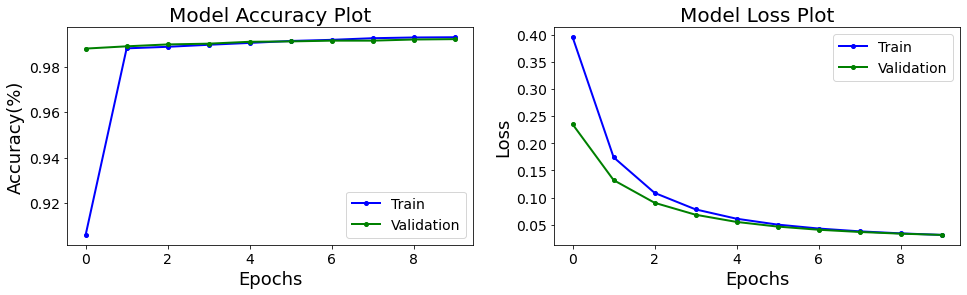

Confusion Matrix Plot
188/188 [==============================] - 6s 25ms/step
[[2970   30]
 [  21 2979]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3000
           1       0.99      0.99      0.99      3000

    accuracy                           0.99      6000
   macro avg       0.99      0.99      0.99      6000
weighted avg       0.99      0.99      0.99      6000



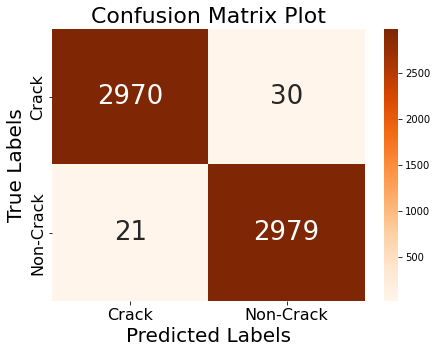

In [ ]:
#Graphs
from matplotlib import pyplot as plt

#Model Accuracy And Loss Plots
print("Model Accuracy And Loss Plots")
plt.figure(figsize=(16., 4.))
plt.subplots_adjust(hspace=0.4)
ax = plt.subplot(1, 2, 1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
  #label.set_fontname('Arial')
  label.set_fontsize(14)
plt.plot(history['accuracy'], color='blue', marker='o', linewidth=2, markersize=4) #color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=12
plt.plot(history['val_accuracy'], color='green', marker='o', linewidth=2, markersize=4)
plt.title('Model Accuracy Plot', size=20)
plt.ylabel('Accuracy(%)', size=18)
plt.xlabel('Epochs', size=18)
plt.legend(['Train', 'Validation'], loc='lower right', prop={'size': 14})
#plt.axis([-0.5, 40.5, -0.03, 1.03])
#plt.grid(True)

ax = plt.subplot(1, 2, 2)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
  #label.set_fontname('Arial')
  label.set_fontsize(14)
plt.plot(history['loss'], color='blue', marker='o', linewidth=2, markersize=4)
plt.plot(history['val_loss'], color='green', marker='o', linewidth=2, markersize=4)
plt.title('Model Loss Plot', size=20)
plt.ylabel('Loss', size=18)
plt.xlabel('Epochs', size=18)
plt.legend(['Train', 'Validation'], loc='upper right', prop={'size': 14})
#plt.axis([-0.5, 40.5, -0.06, 2.56])
#plt.grid(True)

plt.show()
#Model Accuracy And Loss Plot


#Confusion Matrix
print("Confusion Matrix Plot")
from sklearn.metrics import confusion_matrix, classification_report
y_true = fn.np.argmax(y_test, axis=1)
predict_x = model.predict(x_test)
y_pred = np.argmax(predict_x, axis=1)

cf_matrix = confusion_matrix(y_true, y_pred)
print(cf_matrix)
classification_report = classification_report(y_true, y_pred)
print(classification_report)

import seaborn as sns
import pandas as pd
classes = ['Crack', 'Non-Crack']
cf_matrix_df = pd.DataFrame(cf_matrix,
                            index = classes,
                            columns = classes)

fig, ax = plt.subplots(1, 1, figsize=(7, 5))
heatmap = sns.heatmap(cf_matrix_df, annot=True, fmt="d", cmap=plt.cm.Oranges, annot_kws={'size': 26, 'rotation': 0}, ax=ax)
heatmap.set_xticklabels(heatmap.get_xticklabels(), size=16, rotation=0)
heatmap.set_yticklabels(heatmap.get_yticklabels(), size=16, rotation=90)
plt.title('Confusion Matrix Plot', size=22)
plt.ylabel('True Labels', size=20)
plt.xlabel('Predicted Labels', size=20)
plt.show()
#Confusion Matrix

### **2) VGG16**

In [ ]:
#Transfer Learning
#----------------
transfer_model = VGG16(
    include_top=False,
    weights='imagenet',
    input_tensor=model_input
    )

#Partial Layer Freezing
for layer in transfer_model.layers:
  layer.trainable = False

new_model = transfer_model.output
new_model = GlobalAveragePooling2D()(new_model)
new_model = Dense(2, activation='sigmoid')(new_model)

#Combine Models
model = Model(inputs=transfer_model.input, outputs=new_model)
model.summary()
#----------------
#Transfer Learning


print("Train: ", x_train.shape, ", Val: ", x_val.shape, ", Test: ", x_test.shape)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss="binary_crossentropy",
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose=1,
                    validation_data=(x_val, y_val)
                   )

model.save('ModelTrainingResults/BuildingConcreteSurfaceCrack_VGG16.h5')
fn.np.save('ModelTrainingResults/BuildingConcreteSurfaceCrack_VGG16.npy', history.history)

58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 48, 48, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 48, 48, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 48, 48, 128)       147584    
                                                              

In [ ]:
print("[INFO] Calculating model accuracy")
print("Test Dataset: ", x_test.shape)
scores = model.evaluate(x_test, y_test)
print(scores)
print(f"Final Test Loss: {scores[0]}")
print(f"Final Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
Test Dataset:  (6000, 96, 96, 3)
188/188 [==============================] - 5s 28ms/step - loss: 0.0315 - accuracy: 0.9962
[0.031510137021541595, 0.9961666464805603]
Final Test Loss: 0.031510137021541595
Final Test Accuracy: 99.61666464805603


In [ ]:
model = fn.keras.models.load_model("ModelTrainingResults/BuildingConcreteSurfaceCrack_VGG16.h5")
history = fn.np.load('ModelTrainingResults/BuildingConcreteSurfaceCrack_VGG16.npy', allow_pickle='TRUE').item()

Model Accuracy And Loss Plots


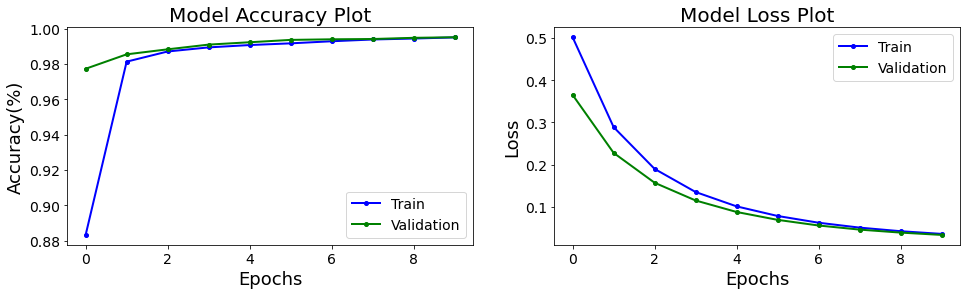

Confusion Matrix Plot
188/188 [==============================] - 5s 26ms/step
[[2988   12]
 [  11 2989]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3000
           1       1.00      1.00      1.00      3000

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



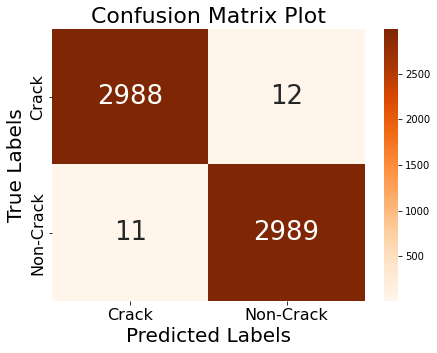

In [ ]:
#Graphs
from matplotlib import pyplot as plt

#Model Accuracy And Loss Plots
print("Model Accuracy And Loss Plots")
plt.figure(figsize=(16., 4.))
plt.subplots_adjust(hspace=0.4)
ax = plt.subplot(1, 2, 1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
  #label.set_fontname('Arial')
  label.set_fontsize(14)
plt.plot(history['accuracy'], color='blue', marker='o', linewidth=2, markersize=4) #color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=12
plt.plot(history['val_accuracy'], color='green', marker='o', linewidth=2, markersize=4)
plt.title('Model Accuracy Plot', size=20)
plt.ylabel('Accuracy(%)', size=18)
plt.xlabel('Epochs', size=18)
plt.legend(['Train', 'Validation'], loc='lower right', prop={'size': 14})
#plt.axis([-0.5, 40.5, -0.03, 1.03])
#plt.grid(True)

ax = plt.subplot(1, 2, 2)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
  #label.set_fontname('Arial')
  label.set_fontsize(14)
plt.plot(history['loss'], color='blue', marker='o', linewidth=2, markersize=4)
plt.plot(history['val_loss'], color='green', marker='o', linewidth=2, markersize=4)
plt.title('Model Loss Plot', size=20)
plt.ylabel('Loss', size=18)
plt.xlabel('Epochs', size=18)
plt.legend(['Train', 'Validation'], loc='upper right', prop={'size': 14})
#plt.axis([-0.5, 40.5, -0.06, 2.56])
#plt.grid(True)

plt.show()
#Model Accuracy And Loss Plot


#Confusion Matrix
print("Confusion Matrix Plot")
from sklearn.metrics import confusion_matrix, classification_report
y_true = fn.np.argmax(y_test, axis=1)
predict_x = model.predict(x_test)
y_pred = np.argmax(predict_x, axis=1)

cf_matrix = confusion_matrix(y_true, y_pred)
print(cf_matrix)
classification_report = classification_report(y_true, y_pred)
print(classification_report)

import seaborn as sns
import pandas as pd
classes = ['Crack', 'Non-Crack']
cf_matrix_df = pd.DataFrame(cf_matrix,
                            index = classes,
                            columns = classes)

fig, ax = plt.subplots(1, 1, figsize=(7, 5))
heatmap = sns.heatmap(cf_matrix_df, annot=True, fmt="d", cmap=plt.cm.Oranges, annot_kws={'size': 26, 'rotation': 0}, ax=ax)
heatmap.set_xticklabels(heatmap.get_xticklabels(), size=16, rotation=0)
heatmap.set_yticklabels(heatmap.get_yticklabels(), size=16, rotation=90)
plt.title('Confusion Matrix Plot', size=22)
plt.ylabel('True Labels', size=20)
plt.xlabel('Predicted Labels', size=20)
plt.show()
#Confusion Matrix

### **3) ResNet101**

In [ ]:
#Transfer Learning
#----------------
transfer_model = ResNet101(
    include_top=False,
    weights='imagenet',
    input_tensor=model_input
    )

#Partial Layer Freezing
for layer in transfer_model.layers:
  layer.trainable = False

new_model = transfer_model.output
new_model = GlobalAveragePooling2D()(new_model)
new_model = Dense(2, activation='sigmoid')(new_model)

#Combine Models
model = Model(inputs=transfer_model.input, outputs=new_model)
model.summary()
#----------------
#Transfer Learning


print("Train: ", x_train.shape, ", Val: ", x_val.shape, ", Test: ", x_test.shape)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss="binary_crossentropy",
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose=1,
                    validation_data=(x_val, y_val)
                   )

model.save('ModelTrainingResults/BuildingConcreteSurfaceCrack_ResNet101.h5')
fn.np.save('ModelTrainingResults/BuildingConcreteSurfaceCrack_ResNet101.npy', history.history)

171446536/171446536 [==============================] - 8s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 102, 102, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 48, 48, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 48, 48, 64)   256         ['conv1_conv[0][0]']             
                           

In [ ]:
print("[INFO] Calculating model accuracy")
print("Test Dataset: ", x_test.shape)
scores = model.evaluate(x_test, y_test)
print(scores)
print(f"Final Test Loss: {scores[0]}")
print(f"Final Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
Test Dataset:  (6000, 96, 96, 3)
188/188 [==============================] - 9s 49ms/step - loss: 0.3096 - accuracy: 0.9323
[0.3095851540565491, 0.9323333501815796]
Final Test Loss: 0.3095851540565491
Final Test Accuracy: 93.23333501815796


In [ ]:
model = fn.keras.models.load_model("ModelTrainingResults/BuildingConcreteSurfaceCrack_ResNet101.h5")
history = fn.np.load('ModelTrainingResults/BuildingConcreteSurfaceCrack_ResNet101.npy', allow_pickle='TRUE').item()

Model Accuracy And Loss Plots


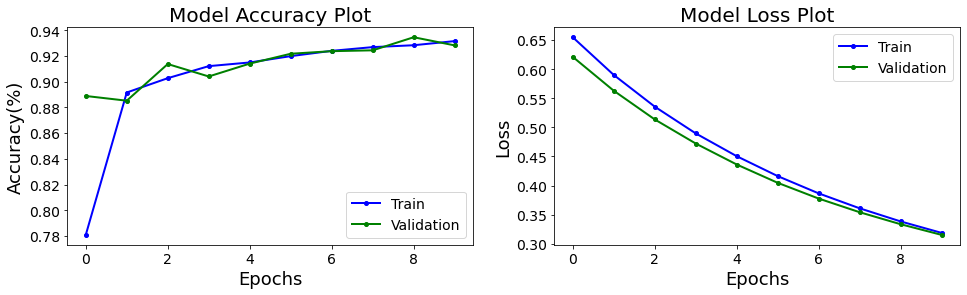

Confusion Matrix Plot
188/188 [==============================] - 9s 39ms/step
[[2603  397]
 [   9 2991]]
              precision    recall  f1-score   support

           0       1.00      0.87      0.93      3000
           1       0.88      1.00      0.94      3000

    accuracy                           0.93      6000
   macro avg       0.94      0.93      0.93      6000
weighted avg       0.94      0.93      0.93      6000



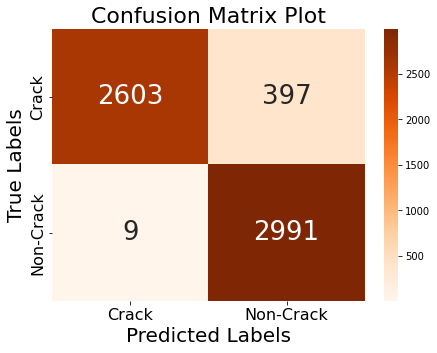

In [ ]:
#Graphs
from matplotlib import pyplot as plt

#Model Accuracy And Loss Plots
print("Model Accuracy And Loss Plots")
plt.figure(figsize=(16., 4.))
plt.subplots_adjust(hspace=0.4)
ax = plt.subplot(1, 2, 1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
  #label.set_fontname('Arial')
  label.set_fontsize(14)
plt.plot(history['accuracy'], color='blue', marker='o', linewidth=2, markersize=4) #color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=12
plt.plot(history['val_accuracy'], color='green', marker='o', linewidth=2, markersize=4)
plt.title('Model Accuracy Plot', size=20)
plt.ylabel('Accuracy(%)', size=18)
plt.xlabel('Epochs', size=18)
plt.legend(['Train', 'Validation'], loc='lower right', prop={'size': 14})
#plt.axis([-0.5, 40.5, -0.03, 1.03])
#plt.grid(True)

ax = plt.subplot(1, 2, 2)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
  #label.set_fontname('Arial')
  label.set_fontsize(14)
plt.plot(history['loss'], color='blue', marker='o', linewidth=2, markersize=4)
plt.plot(history['val_loss'], color='green', marker='o', linewidth=2, markersize=4)
plt.title('Model Loss Plot', size=20)
plt.ylabel('Loss', size=18)
plt.xlabel('Epochs', size=18)
plt.legend(['Train', 'Validation'], loc='upper right', prop={'size': 14})
#plt.axis([-0.5, 40.5, -0.06, 2.56])
#plt.grid(True)

plt.show()
#Model Accuracy And Loss Plot


#Confusion Matrix
print("Confusion Matrix Plot")
from sklearn.metrics import confusion_matrix, classification_report
y_true = fn.np.argmax(y_test, axis=1)
predict_x = model.predict(x_test)
y_pred = np.argmax(predict_x, axis=1)

cf_matrix = confusion_matrix(y_true, y_pred)
print(cf_matrix)
classification_report = classification_report(y_true, y_pred)
print(classification_report)

import seaborn as sns
import pandas as pd
classes = ['Crack', 'Non-Crack']
cf_matrix_df = pd.DataFrame(cf_matrix,
                            index = classes,
                            columns = classes)

fig, ax = plt.subplots(1, 1, figsize=(7, 5))
heatmap = sns.heatmap(cf_matrix_df, annot=True, fmt="d", cmap=plt.cm.Oranges, annot_kws={'size': 26, 'rotation': 0}, ax=ax)
heatmap.set_xticklabels(heatmap.get_xticklabels(), size=16, rotation=0)
heatmap.set_yticklabels(heatmap.get_yticklabels(), size=16, rotation=90)
plt.title('Confusion Matrix Plot', size=22)
plt.ylabel('True Labels', size=20)
plt.xlabel('Predicted Labels', size=20)
plt.show()
#Confusion Matrix

### **4) InceptionV3**

In [ ]:
#Transfer Learning
#----------------
transfer_model = InceptionV3(
    include_top=False,
    weights='imagenet',
    input_tensor=model_input
    )

#Partial Layer Freezing
for layer in transfer_model.layers:
  layer.trainable = False

new_model = transfer_model.output
new_model = GlobalAveragePooling2D()(new_model)
new_model = Dense(2, activation='sigmoid')(new_model)

#Combine Models
model = Model(inputs=transfer_model.input, outputs=new_model)
model.summary()
#----------------
#Transfer Learning


print("Train: ", x_train.shape, ", Val: ", x_val.shape, ", Test: ", x_test.shape)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss="binary_crossentropy",
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose=1,
                    validation_data=(x_val, y_val)
                   )

model.save('ModelTrainingResults/BuildingConcreteSurfaceCrack_InceptionV3.h5')
fn.np.save('ModelTrainingResults/BuildingConcreteSurfaceCrack_InceptionV3.npy', history.history)

87910968/87910968 [==============================] - 3s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 47, 47, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 47, 47, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)     

In [ ]:
print("[INFO] Calculating model accuracy")
print("Test Dataset: ", x_test.shape)
scores = model.evaluate(x_test, y_test)
print(scores)
print(f"Final Test Loss: {scores[0]}")
print(f"Final Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
Test Dataset:  (6000, 96, 96, 3)
188/188 [==============================] - 4s 21ms/step - loss: 0.0299 - accuracy: 0.9913
[0.029890256002545357, 0.9913333058357239]
Final Test Loss: 0.029890256002545357
Final Test Accuracy: 99.13333058357239


In [ ]:
model = fn.keras.models.load_model("ModelTrainingResults/BuildingConcreteSurfaceCrack_InceptionV3.h5")
history = fn.np.load('ModelTrainingResults/BuildingConcreteSurfaceCrack_InceptionV3.npy', allow_pickle='TRUE').item()

Model Accuracy And Loss Plots


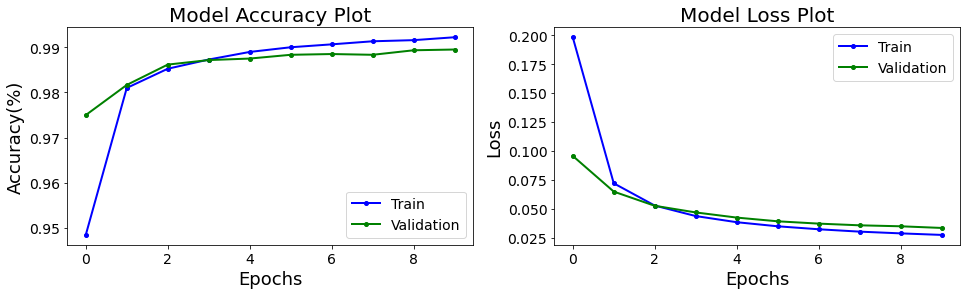

Confusion Matrix Plot
188/188 [==============================] - 5s 21ms/step
[[2968   32]
 [  20 2980]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3000
           1       0.99      0.99      0.99      3000

    accuracy                           0.99      6000
   macro avg       0.99      0.99      0.99      6000
weighted avg       0.99      0.99      0.99      6000



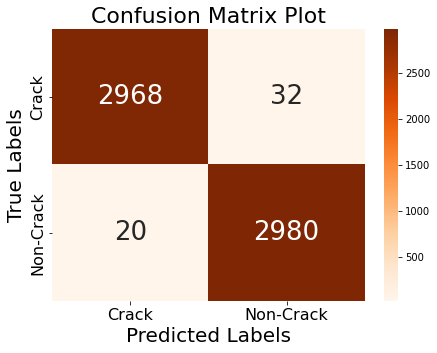

In [ ]:
#Graphs
from matplotlib import pyplot as plt

#Model Accuracy And Loss Plots
print("Model Accuracy And Loss Plots")
plt.figure(figsize=(16., 4.))
plt.subplots_adjust(hspace=0.4)
ax = plt.subplot(1, 2, 1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
  #label.set_fontname('Arial')
  label.set_fontsize(14)
plt.plot(history['accuracy'], color='blue', marker='o', linewidth=2, markersize=4) #color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=12
plt.plot(history['val_accuracy'], color='green', marker='o', linewidth=2, markersize=4)
plt.title('Model Accuracy Plot', size=20)
plt.ylabel('Accuracy(%)', size=18)
plt.xlabel('Epochs', size=18)
plt.legend(['Train', 'Validation'], loc='lower right', prop={'size': 14})
#plt.axis([-0.5, 40.5, -0.03, 1.03])
#plt.grid(True)

ax = plt.subplot(1, 2, 2)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
  #label.set_fontname('Arial')
  label.set_fontsize(14)
plt.plot(history['loss'], color='blue', marker='o', linewidth=2, markersize=4)
plt.plot(history['val_loss'], color='green', marker='o', linewidth=2, markersize=4)
plt.title('Model Loss Plot', size=20)
plt.ylabel('Loss', size=18)
plt.xlabel('Epochs', size=18)
plt.legend(['Train', 'Validation'], loc='upper right', prop={'size': 14})
#plt.axis([-0.5, 40.5, -0.06, 2.56])
#plt.grid(True)

plt.show()
#Model Accuracy And Loss Plot


#Confusion Matrix
print("Confusion Matrix Plot")
from sklearn.metrics import confusion_matrix, classification_report
y_true = fn.np.argmax(y_test, axis=1)
predict_x = model.predict(x_test)
y_pred = np.argmax(predict_x, axis=1)

cf_matrix = confusion_matrix(y_true, y_pred)
print(cf_matrix)
classification_report = classification_report(y_true, y_pred)
print(classification_report)

import seaborn as sns
import pandas as pd
classes = ['Crack', 'Non-Crack']
cf_matrix_df = pd.DataFrame(cf_matrix,
                            index = classes,
                            columns = classes)

fig, ax = plt.subplots(1, 1, figsize=(7, 5))
heatmap = sns.heatmap(cf_matrix_df, annot=True, fmt="d", cmap=plt.cm.Oranges, annot_kws={'size': 26, 'rotation': 0}, ax=ax)
heatmap.set_xticklabels(heatmap.get_xticklabels(), size=16, rotation=0)
heatmap.set_yticklabels(heatmap.get_yticklabels(), size=16, rotation=90)
plt.title('Confusion Matrix Plot', size=22)
plt.ylabel('True Labels', size=20)
plt.xlabel('Predicted Labels', size=20)
plt.show()
#Confusion Matrix

### **5) InceptionResNetV2**

In [ ]:
#Transfer Learning
#----------------
transfer_model = InceptionResNetV2(
    include_top=False,
    weights='imagenet',
    input_tensor=model_input
    )

#Partial Layer Freezing
for layer in transfer_model.layers:
  layer.trainable = False

new_model = transfer_model.output
new_model = GlobalAveragePooling2D()(new_model)
new_model = Dense(2, activation='sigmoid')(new_model)

#Combine Models
model = Model(inputs=transfer_model.input, outputs=new_model)
model.summary()
#----------------
#Transfer Learning


print("Train: ", x_train.shape, ", Val: ", x_val.shape, ", Test: ", x_test.shape)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss="binary_crossentropy",
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose=1,
                    validation_data=(x_val, y_val)
                   )

model.save('ModelTrainingResults/BuildingConcreteSurfaceCrack_InceptionResNetV2.h5')
fn.np.save('ModelTrainingResults/BuildingConcreteSurfaceCrack_InceptionResNetV2.npy', history.history)

219055592/219055592 [==============================] - 12s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 47, 47, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 47, 47, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)  

In [ ]:
print("[INFO] Calculating model accuracy")
print("Test Dataset: ", x_test.shape)
scores = model.evaluate(x_test, y_test)
print(scores)
print(f"Final Test Loss: {scores[0]}")
print(f"Final Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
Test Dataset:  (6000, 96, 96, 3)
188/188 [==============================] - 9s 49ms/step - loss: 0.0402 - accuracy: 0.9910
[0.04019692912697792, 0.9909999966621399]
Final Test Loss: 0.04019692912697792
Final Test Accuracy: 99.09999966621399


In [ ]:
model = fn.keras.models.load_model("ModelTrainingResults/BuildingConcreteSurfaceCrack_InceptionResNetV2.h5")
history = fn.np.load('ModelTrainingResults/BuildingConcreteSurfaceCrack_InceptionResNetV2.npy', allow_pickle='TRUE').item()

Model Accuracy And Loss Plots


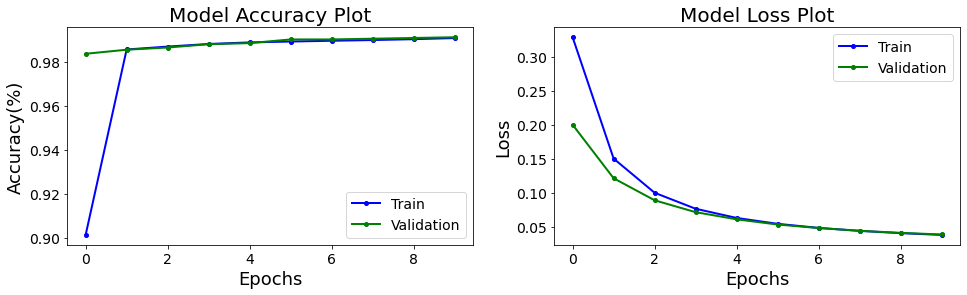

Confusion Matrix Plot
188/188 [==============================] - 13s 48ms/step
[[2966   34]
 [  20 2980]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3000
           1       0.99      0.99      0.99      3000

    accuracy                           0.99      6000
   macro avg       0.99      0.99      0.99      6000
weighted avg       0.99      0.99      0.99      6000



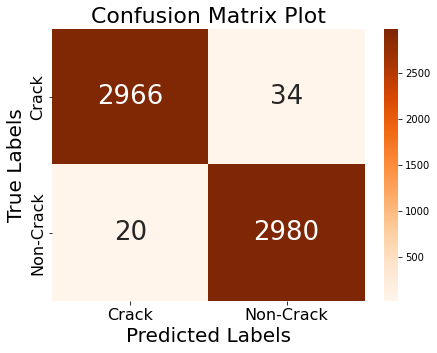

In [ ]:
#Graphs
from matplotlib import pyplot as plt

#Model Accuracy And Loss Plots
print("Model Accuracy And Loss Plots")
plt.figure(figsize=(16., 4.))
plt.subplots_adjust(hspace=0.4)
ax = plt.subplot(1, 2, 1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
  #label.set_fontname('Arial')
  label.set_fontsize(14)
plt.plot(history['accuracy'], color='blue', marker='o', linewidth=2, markersize=4) #color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=12
plt.plot(history['val_accuracy'], color='green', marker='o', linewidth=2, markersize=4)
plt.title('Model Accuracy Plot', size=20)
plt.ylabel('Accuracy(%)', size=18)
plt.xlabel('Epochs', size=18)
plt.legend(['Train', 'Validation'], loc='lower right', prop={'size': 14})
#plt.axis([-0.5, 40.5, -0.03, 1.03])
#plt.grid(True)

ax = plt.subplot(1, 2, 2)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
  #label.set_fontname('Arial')
  label.set_fontsize(14)
plt.plot(history['loss'], color='blue', marker='o', linewidth=2, markersize=4)
plt.plot(history['val_loss'], color='green', marker='o', linewidth=2, markersize=4)
plt.title('Model Loss Plot', size=20)
plt.ylabel('Loss', size=18)
plt.xlabel('Epochs', size=18)
plt.legend(['Train', 'Validation'], loc='upper right', prop={'size': 14})
#plt.axis([-0.5, 40.5, -0.06, 2.56])
#plt.grid(True)

plt.show()
#Model Accuracy And Loss Plot


#Confusion Matrix
print("Confusion Matrix Plot")
from sklearn.metrics import confusion_matrix, classification_report
y_true = fn.np.argmax(y_test, axis=1)
predict_x = model.predict(x_test)
y_pred = np.argmax(predict_x, axis=1)

cf_matrix = confusion_matrix(y_true, y_pred)
print(cf_matrix)
classification_report = classification_report(y_true, y_pred)
print(classification_report)

import seaborn as sns
import pandas as pd
classes = ['Crack', 'Non-Crack']
cf_matrix_df = pd.DataFrame(cf_matrix,
                            index = classes,
                            columns = classes)

fig, ax = plt.subplots(1, 1, figsize=(7, 5))
heatmap = sns.heatmap(cf_matrix_df, annot=True, fmt="d", cmap=plt.cm.Oranges, annot_kws={'size': 26, 'rotation': 0}, ax=ax)
heatmap.set_xticklabels(heatmap.get_xticklabels(), size=16, rotation=0)
heatmap.set_yticklabels(heatmap.get_yticklabels(), size=16, rotation=90)
plt.title('Confusion Matrix Plot', size=22)
plt.ylabel('True Labels', size=20)
plt.xlabel('Predicted Labels', size=20)
plt.show()
#Confusion Matrix

### **6) MobileNetV2**

In [ ]:
#Transfer Learning
#----------------
transfer_model = MobileNetV2(
    include_top=False,
    weights='imagenet',
    input_tensor=model_input
    )

#Partial Layer Freezing
for layer in transfer_model.layers:
  layer.trainable = False

new_model = transfer_model.output
new_model = GlobalAveragePooling2D()(new_model)
new_model = Dense(2, activation='sigmoid')(new_model)

#Combine Models
model = Model(inputs=transfer_model.input, outputs=new_model)
model.summary()
#----------------
#Transfer Learning


print("Train: ", x_train.shape, ", Val: ", x_val.shape, ", Test: ", x_test.shape)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss="binary_crossentropy",
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose=1,
                    validation_data=(x_val, y_val)
                   )

model.save('ModelTrainingResults/BuildingConcreteSurfaceCrack_MobileNetV2.h5')
fn.np.save('ModelTrainingResults/BuildingConcreteSurfaceCrack_MobileNetV2.npy', history.history)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 48, 48, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 48, 48, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 48, 48, 32)   0           ['bn_Conv1[0][0]']               
                                                                                              

In [ ]:
print("[INFO] Calculating model accuracy")
print("Test Dataset: ", x_test.shape)
scores = model.evaluate(x_test, y_test)
print(scores)
print(f"Final Test Loss: {scores[0]}")
print(f"Final Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
Test Dataset:  (6000, 96, 96, 3)
188/188 [==============================] - 2s 13ms/step - loss: 0.0178 - accuracy: 0.9947
[0.01784968376159668, 0.9946666955947876]
Final Test Loss: 0.01784968376159668
Final Test Accuracy: 99.46666955947876


In [ ]:
model = fn.keras.models.load_model("ModelTrainingResults/BuildingConcreteSurfaceCrack_MobileNetV2.h5")
history = fn.np.load('ModelTrainingResults/BuildingConcreteSurfaceCrack_MobileNetV2.npy', allow_pickle='TRUE').item()

Model Accuracy And Loss Plots


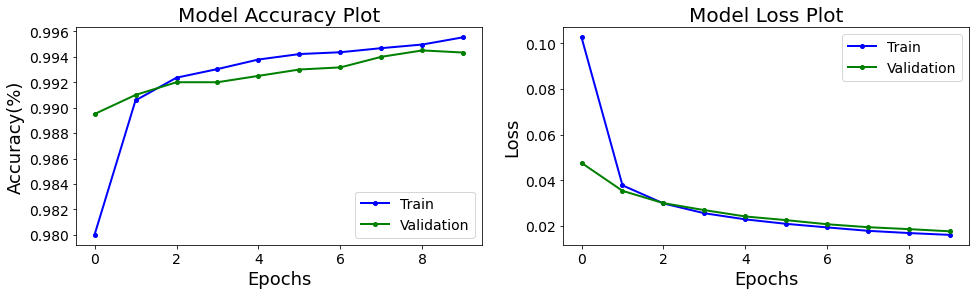

Confusion Matrix Plot
188/188 [==============================] - 3s 10ms/step
[[2987   13]
 [  19 2981]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3000
           1       1.00      0.99      0.99      3000

    accuracy                           0.99      6000
   macro avg       0.99      0.99      0.99      6000
weighted avg       0.99      0.99      0.99      6000



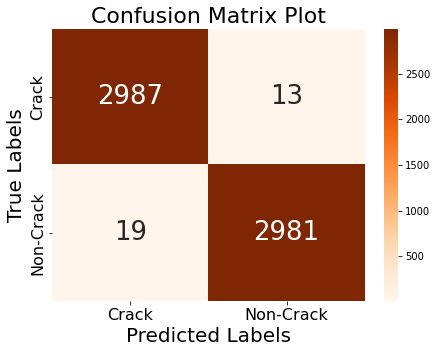

In [ ]:
#Graphs
from matplotlib import pyplot as plt

#Model Accuracy And Loss Plots
print("Model Accuracy And Loss Plots")
plt.figure(figsize=(16., 4.))
plt.subplots_adjust(hspace=0.4)
ax = plt.subplot(1, 2, 1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
  #label.set_fontname('Arial')
  label.set_fontsize(14)
plt.plot(history['accuracy'], color='blue', marker='o', linewidth=2, markersize=4) #color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=12
plt.plot(history['val_accuracy'], color='green', marker='o', linewidth=2, markersize=4)
plt.title('Model Accuracy Plot', size=20)
plt.ylabel('Accuracy(%)', size=18)
plt.xlabel('Epochs', size=18)
plt.legend(['Train', 'Validation'], loc='lower right', prop={'size': 14})
#plt.axis([-0.5, 40.5, -0.03, 1.03])
#plt.grid(True)

ax = plt.subplot(1, 2, 2)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
  #label.set_fontname('Arial')
  label.set_fontsize(14)
plt.plot(history['loss'], color='blue', marker='o', linewidth=2, markersize=4)
plt.plot(history['val_loss'], color='green', marker='o', linewidth=2, markersize=4)
plt.title('Model Loss Plot', size=20)
plt.ylabel('Loss', size=18)
plt.xlabel('Epochs', size=18)
plt.legend(['Train', 'Validation'], loc='upper right', prop={'size': 14})
#plt.axis([-0.5, 40.5, -0.06, 2.56])
#plt.grid(True)

plt.show()
#Model Accuracy And Loss Plot


#Confusion Matrix
print("Confusion Matrix Plot")
from sklearn.metrics import confusion_matrix, classification_report
y_true = fn.np.argmax(y_test, axis=1)
predict_x = model.predict(x_test)
y_pred = np.argmax(predict_x, axis=1)

cf_matrix = confusion_matrix(y_true, y_pred)
print(cf_matrix)
classification_report = classification_report(y_true, y_pred)
print(classification_report)

import seaborn as sns
import pandas as pd
classes = ['Crack', 'Non-Crack']
cf_matrix_df = pd.DataFrame(cf_matrix,
                            index = classes,
                            columns = classes)

fig, ax = plt.subplots(1, 1, figsize=(7, 5))
heatmap = sns.heatmap(cf_matrix_df, annot=True, fmt="d", cmap=plt.cm.Oranges, annot_kws={'size': 26, 'rotation': 0}, ax=ax)
heatmap.set_xticklabels(heatmap.get_xticklabels(), size=16, rotation=0)
heatmap.set_yticklabels(heatmap.get_yticklabels(), size=16, rotation=90)
plt.title('Confusion Matrix Plot', size=22)
plt.ylabel('True Labels', size=20)
plt.xlabel('Predicted Labels', size=20)
plt.show()
#Confusion Matrix

### **7) DenseNet169**

In [ ]:
#Transfer Learning
#----------------
transfer_model = DenseNet169(
    include_top=False,
    weights='imagenet',
    input_tensor=model_input
    )

#Partial Layer Freezing
for layer in transfer_model.layers:
  layer.trainable = False

new_model = transfer_model.output
new_model = GlobalAveragePooling2D()(new_model)
new_model = Dense(2, activation='sigmoid')(new_model)

#Combine Models
model = Model(inputs=transfer_model.input, outputs=new_model)
model.summary()
#----------------
#Transfer Learning


print("Train: ", x_train.shape, ", Val: ", x_val.shape, ", Test: ", x_test.shape)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss="binary_crossentropy",
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose=1,
                    validation_data=(x_val, y_val)
                   )

model.save('ModelTrainingResults/BuildingConcreteSurfaceCrack_DenseNet169.h5')
fn.np.save('ModelTrainingResults/BuildingConcreteSurfaceCrack_DenseNet169.npy', history.history)

51877672/51877672 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 102, 102, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 48, 48, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 48, 48, 64)   256         ['conv1/conv[0][0]']             
                             

In [ ]:
print("[INFO] Calculating model accuracy")
print("Test Dataset: ", x_test.shape)
scores = model.evaluate(x_test, y_test)
print(scores)
print(f"Final Test Loss: {scores[0]}")
print(f"Final Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
Test Dataset:  (6000, 96, 96, 3)
188/188 [==============================] - 7s 36ms/step - loss: 0.0162 - accuracy: 0.9962
[0.01619749888777733, 0.9961666464805603]
Final Test Loss: 0.01619749888777733
Final Test Accuracy: 99.61666464805603


In [ ]:
model = fn.keras.models.load_model("ModelTrainingResults/BuildingConcreteSurfaceCrack_DenseNet169.h5")
history = fn.np.load('ModelTrainingResults/BuildingConcreteSurfaceCrack_DenseNet169.npy', allow_pickle='TRUE').item()

Model Accuracy And Loss Plots


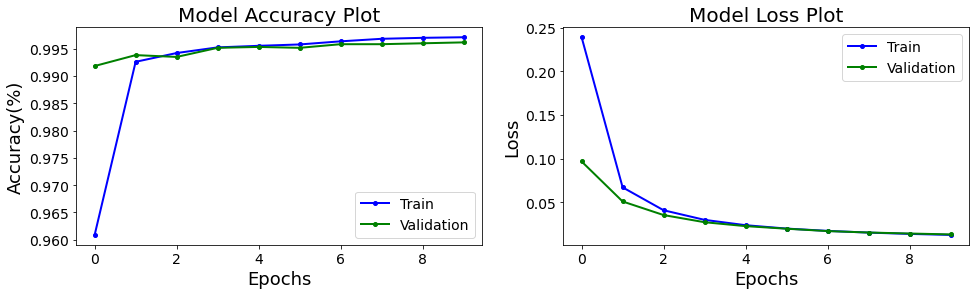

Confusion Matrix Plot
188/188 [==============================] - 8s 28ms/step
[[2989   11]
 [  12 2988]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3000
           1       1.00      1.00      1.00      3000

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



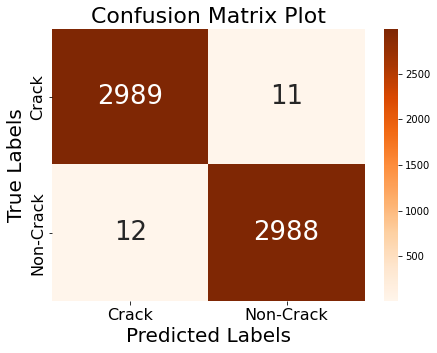

In [ ]:
#Graphs
from matplotlib import pyplot as plt

#Model Accuracy And Loss Plots
print("Model Accuracy And Loss Plots")
plt.figure(figsize=(16., 4.))
plt.subplots_adjust(hspace=0.4)
ax = plt.subplot(1, 2, 1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
  #label.set_fontname('Arial')
  label.set_fontsize(14)
plt.plot(history['accuracy'], color='blue', marker='o', linewidth=2, markersize=4) #color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=12
plt.plot(history['val_accuracy'], color='green', marker='o', linewidth=2, markersize=4)
plt.title('Model Accuracy Plot', size=20)
plt.ylabel('Accuracy(%)', size=18)
plt.xlabel('Epochs', size=18)
plt.legend(['Train', 'Validation'], loc='lower right', prop={'size': 14})
#plt.axis([-0.5, 40.5, -0.03, 1.03])
#plt.grid(True)

ax = plt.subplot(1, 2, 2)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
  #label.set_fontname('Arial')
  label.set_fontsize(14)
plt.plot(history['loss'], color='blue', marker='o', linewidth=2, markersize=4)
plt.plot(history['val_loss'], color='green', marker='o', linewidth=2, markersize=4)
plt.title('Model Loss Plot', size=20)
plt.ylabel('Loss', size=18)
plt.xlabel('Epochs', size=18)
plt.legend(['Train', 'Validation'], loc='upper right', prop={'size': 14})
#plt.axis([-0.5, 40.5, -0.06, 2.56])
#plt.grid(True)

plt.show()
#Model Accuracy And Loss Plot


#Confusion Matrix
print("Confusion Matrix Plot")
from sklearn.metrics import confusion_matrix, classification_report
y_true = fn.np.argmax(y_test, axis=1)
predict_x = model.predict(x_test)
y_pred = np.argmax(predict_x, axis=1)

cf_matrix = confusion_matrix(y_true, y_pred)
print(cf_matrix)
classification_report = classification_report(y_true, y_pred)
print(classification_report)

import seaborn as sns
import pandas as pd
classes = ['Crack', 'Non-Crack']
cf_matrix_df = pd.DataFrame(cf_matrix,
                            index = classes,
                            columns = classes)

fig, ax = plt.subplots(1, 1, figsize=(7, 5))
heatmap = sns.heatmap(cf_matrix_df, annot=True, fmt="d", cmap=plt.cm.Oranges, annot_kws={'size': 26, 'rotation': 0}, ax=ax)
heatmap.set_xticklabels(heatmap.get_xticklabels(), size=16, rotation=0)
heatmap.set_yticklabels(heatmap.get_yticklabels(), size=16, rotation=90)
plt.title('Confusion Matrix Plot', size=22)
plt.ylabel('True Labels', size=20)
plt.xlabel('Predicted Labels', size=20)
plt.show()
#Confusion Matrix

### **8) NASNetMobile**

In [ ]:
#Transfer Learning
#----------------
transfer_model = NASNetMobile(
    include_top=False,
    weights='imagenet',
    input_tensor=model_input
    )

#Partial Layer Freezing
for layer in transfer_model.layers:
  layer.trainable = False

new_model = transfer_model.output
new_model = GlobalAveragePooling2D()(new_model)
new_model = Dense(2, activation='sigmoid')(new_model)

#Combine Models
model = Model(inputs=transfer_model.input, outputs=new_model)
model.summary()
#----------------
#Transfer Learning


print("Train: ", x_train.shape, ", Val: ", x_val.shape, ", Test: ", x_test.shape)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss="binary_crossentropy",
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose=1,
                    validation_data=(x_val, y_val)
                   )

model.save('ModelTrainingResults/BuildingConcreteSurfaceCrack_NASNetMobile.h5')
fn.np.save('ModelTrainingResults/BuildingConcreteSurfaceCrack_NASNetMobile.npy', history.history)

19993432/19993432 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 stem_conv1 (Conv2D)            (None, 47, 47, 32)   864         ['input_1[0][0]']                
                                                                                                  
 stem_bn1 (BatchNormalization)  (None, 47, 47, 32)   128         ['stem_conv1[0][0]']             
                                                                                                  
 activation (Activation)        (None, 47, 47, 32)   0           ['stem_bn1[0][0]']               
                             

In [ ]:
print("[INFO] Calculating model accuracy")
print("Test Dataset: ", x_test.shape)
scores = model.evaluate(x_test, y_test)
print(scores)
print(f"Final Test Loss: {scores[0]}")
print(f"Final Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
Test Dataset:  (6000, 96, 96, 3)
188/188 [==============================] - 6s 30ms/step - loss: 0.0290 - accuracy: 0.9922
[0.029010890051722527, 0.9921666383743286]
Final Test Loss: 0.029010890051722527
Final Test Accuracy: 99.21666383743286


In [ ]:
model = fn.keras.models.load_model("ModelTrainingResults/BuildingConcreteSurfaceCrack_NASNetMobile.h5")
history = fn.np.load('ModelTrainingResults/BuildingConcreteSurfaceCrack_NASNetMobile.npy', allow_pickle='TRUE').item()

Model Accuracy And Loss Plots


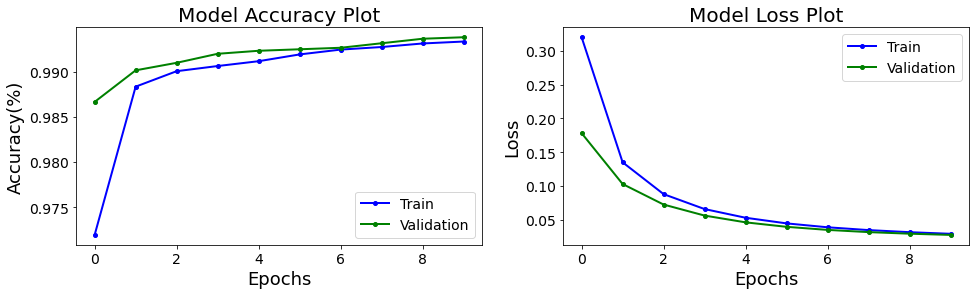

Confusion Matrix Plot
188/188 [==============================] - 10s 30ms/step
[[2982   18]
 [  29 2971]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3000
           1       0.99      0.99      0.99      3000

    accuracy                           0.99      6000
   macro avg       0.99      0.99      0.99      6000
weighted avg       0.99      0.99      0.99      6000



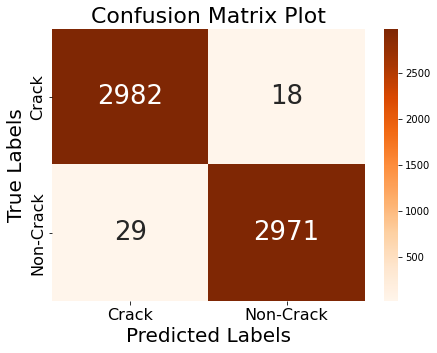

In [ ]:
#Graphs
from matplotlib import pyplot as plt

#Model Accuracy And Loss Plots
print("Model Accuracy And Loss Plots")
plt.figure(figsize=(16., 4.))
plt.subplots_adjust(hspace=0.4)
ax = plt.subplot(1, 2, 1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
  #label.set_fontname('Arial')
  label.set_fontsize(14)
plt.plot(history['accuracy'], color='blue', marker='o', linewidth=2, markersize=4) #color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=12
plt.plot(history['val_accuracy'], color='green', marker='o', linewidth=2, markersize=4)
plt.title('Model Accuracy Plot', size=20)
plt.ylabel('Accuracy(%)', size=18)
plt.xlabel('Epochs', size=18)
plt.legend(['Train', 'Validation'], loc='lower right', prop={'size': 14})
#plt.axis([-0.5, 40.5, -0.03, 1.03])
#plt.grid(True)

ax = plt.subplot(1, 2, 2)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
  #label.set_fontname('Arial')
  label.set_fontsize(14)
plt.plot(history['loss'], color='blue', marker='o', linewidth=2, markersize=4)
plt.plot(history['val_loss'], color='green', marker='o', linewidth=2, markersize=4)
plt.title('Model Loss Plot', size=20)
plt.ylabel('Loss', size=18)
plt.xlabel('Epochs', size=18)
plt.legend(['Train', 'Validation'], loc='upper right', prop={'size': 14})
#plt.axis([-0.5, 40.5, -0.06, 2.56])
#plt.grid(True)

plt.show()
#Model Accuracy And Loss Plot


#Confusion Matrix
print("Confusion Matrix Plot")
from sklearn.metrics import confusion_matrix, classification_report
y_true = fn.np.argmax(y_test, axis=1)
predict_x = model.predict(x_test)
y_pred = np.argmax(predict_x, axis=1)

cf_matrix = confusion_matrix(y_true, y_pred)
print(cf_matrix)
classification_report = classification_report(y_true, y_pred)
print(classification_report)

import seaborn as sns
import pandas as pd
classes = ['Crack', 'Non-Crack']
cf_matrix_df = pd.DataFrame(cf_matrix,
                            index = classes,
                            columns = classes)

fig, ax = plt.subplots(1, 1, figsize=(7, 5))
heatmap = sns.heatmap(cf_matrix_df, annot=True, fmt="d", cmap=plt.cm.Oranges, annot_kws={'size': 26, 'rotation': 0}, ax=ax)
heatmap.set_xticklabels(heatmap.get_xticklabels(), size=16, rotation=0)
heatmap.set_yticklabels(heatmap.get_yticklabels(), size=16, rotation=90)
plt.title('Confusion Matrix Plot', size=22)
plt.ylabel('True Labels', size=20)
plt.xlabel('Predicted Labels', size=20)
plt.show()
#Confusion Matrix

### **9) EfficientNetB6**

In [ ]:
#Transfer Learning
#----------------
transfer_model = EfficientNetB6(
    include_top=False,
    weights='imagenet',
    input_tensor=model_input
    )

#Partial Layer Freezing
for layer in transfer_model.layers:
  layer.trainable = False

new_model = transfer_model.output
new_model = GlobalAveragePooling2D()(new_model)
new_model = Dense(2, activation='sigmoid')(new_model)

#Combine Models
model = Model(inputs=transfer_model.input, outputs=new_model)
model.summary()
#----------------
#Transfer Learning


print("Train: ", x_train.shape, ", Val: ", x_val.shape, ", Test: ", x_test.shape)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss="binary_crossentropy",
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose=1,
                    validation_data=(x_val, y_val)
                   )

model.save('ModelTrainingResults/BuildingConcreteSurfaceCrack_EfficientNetB6.h5')
fn.np.save('ModelTrainingResults/BuildingConcreteSurfaceCrack_EfficientNetB6.npy', history.history)

165234480/165234480 [==============================] - 2s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 rescaling (Rescaling)          (None, 96, 96, 3)    0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 96, 96, 3)    7           ['rescaling[0][0]']              
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 96, 96, 3)    0           ['normalization[0][0]']          
                           

In [ ]:
print("[INFO] Calculating model accuracy")
print("Test Dataset: ", x_test.shape)
scores = model.evaluate(x_test, y_test)
print(scores)
print(f"Final Test Loss: {scores[0]}")
print(f"Final Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
Test Dataset:  (6000, 96, 96, 3)
188/188 [==============================] - 14s 73ms/step - loss: 0.2864 - accuracy: 0.9083
[0.2863782048225403, 0.9083333611488342]
Final Test Loss: 0.2863782048225403
Final Test Accuracy: 90.83333611488342


In [ ]:
model = fn.keras.models.load_model("ModelTrainingResults/BuildingConcreteSurfaceCrack_EfficientNetB6.h5")
history = fn.np.load('ModelTrainingResults/BuildingConcreteSurfaceCrack_EfficientNetB6.npy', allow_pickle='TRUE').item()

Model Accuracy And Loss Plots


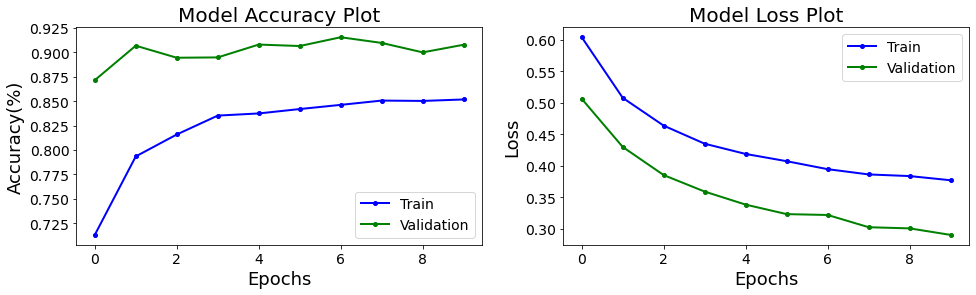

Confusion Matrix Plot
188/188 [==============================] - 16s 67ms/step
[[2599  401]
 [ 149 2851]]
              precision    recall  f1-score   support

           0       0.95      0.87      0.90      3000
           1       0.88      0.95      0.91      3000

    accuracy                           0.91      6000
   macro avg       0.91      0.91      0.91      6000
weighted avg       0.91      0.91      0.91      6000



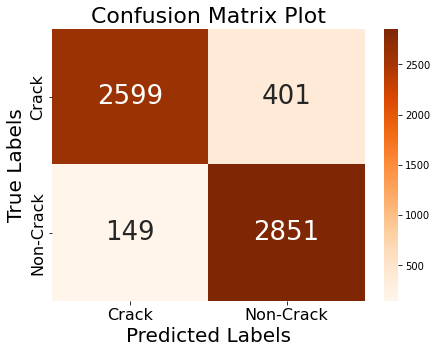

In [ ]:
#Graphs
from matplotlib import pyplot as plt

#Model Accuracy And Loss Plots
print("Model Accuracy And Loss Plots")
plt.figure(figsize=(16., 4.))
plt.subplots_adjust(hspace=0.4)
ax = plt.subplot(1, 2, 1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
  #label.set_fontname('Arial')
  label.set_fontsize(14)
plt.plot(history['accuracy'], color='blue', marker='o', linewidth=2, markersize=4) #color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=12
plt.plot(history['val_accuracy'], color='green', marker='o', linewidth=2, markersize=4)
plt.title('Model Accuracy Plot', size=20)
plt.ylabel('Accuracy(%)', size=18)
plt.xlabel('Epochs', size=18)
plt.legend(['Train', 'Validation'], loc='lower right', prop={'size': 14})
#plt.axis([-0.5, 40.5, -0.03, 1.03])
#plt.grid(True)

ax = plt.subplot(1, 2, 2)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
  #label.set_fontname('Arial')
  label.set_fontsize(14)
plt.plot(history['loss'], color='blue', marker='o', linewidth=2, markersize=4)
plt.plot(history['val_loss'], color='green', marker='o', linewidth=2, markersize=4)
plt.title('Model Loss Plot', size=20)
plt.ylabel('Loss', size=18)
plt.xlabel('Epochs', size=18)
plt.legend(['Train', 'Validation'], loc='upper right', prop={'size': 14})
#plt.axis([-0.5, 40.5, -0.06, 2.56])
#plt.grid(True)

plt.show()
#Model Accuracy And Loss Plot


#Confusion Matrix
print("Confusion Matrix Plot")
from sklearn.metrics import confusion_matrix, classification_report
y_true = fn.np.argmax(y_test, axis=1)
predict_x = model.predict(x_test)
y_pred = np.argmax(predict_x, axis=1)

cf_matrix = confusion_matrix(y_true, y_pred)
print(cf_matrix)
classification_report = classification_report(y_true, y_pred)
print(classification_report)

import seaborn as sns
import pandas as pd
classes = ['Crack', 'Non-Crack']
cf_matrix_df = pd.DataFrame(cf_matrix,
                            index = classes,
                            columns = classes)

fig, ax = plt.subplots(1, 1, figsize=(7, 5))
heatmap = sns.heatmap(cf_matrix_df, annot=True, fmt="d", cmap=plt.cm.Oranges, annot_kws={'size': 26, 'rotation': 0}, ax=ax)
heatmap.set_xticklabels(heatmap.get_xticklabels(), size=16, rotation=0)
heatmap.set_yticklabels(heatmap.get_yticklabels(), size=16, rotation=90)
plt.title('Confusion Matrix Plot', size=22)
plt.ylabel('True Labels', size=20)
plt.xlabel('Predicted Labels', size=20)
plt.show()
#Confusion Matrix

# **2) SelectKerasApplications - TransferLearning ("PartialLayerFreezing And Improved")**

### **1) MobileNetV2_CutLayer**

**Improved (LayerTruncation: DeductedBlock=5, CutPointLayer=block_11_add (None, 6, 6, 96))**

In [ ]:
#Transfer Learning
#----------------
transfer_model = MobileNetV2(
    include_top=False,
    weights='imagenet',
    input_tensor=model_input
    )

for layer in transfer_model.layers:
  layer.trainable = False

#for BatchNormalization in transfer_model.layers:
#  BatchNormalization.trainable = False

new_model = transfer_model.layers[-48].output

# Add New Layers
new_model = Conv2D(384, (1, 1), padding='valid', activation='relu')(new_model)
new_model = BatchNormalization()(new_model)
new_model = MaxPool2D(3, 3)(new_model)
new_model = Dropout(0.25)(new_model)

new_model = GlobalAveragePooling2D()(new_model)
#new_model = Dense(64, activation='relu')(new_model)
#new_model = Dropout(0.20)(new_model)
new_model = Dense(2, activation='sigmoid')(new_model)

#Combine Models
model = Model(inputs=transfer_model.input, outputs=new_model)
model.summary()
#----------------
#Transfer Learning


print("Train: ", x_train.shape, ", Val: ", x_val.shape, ", Test: ", x_test.shape)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss="binary_crossentropy",
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose=1,
                    validation_data=(x_val, y_val)
                   )

model.save('ModelTrainingResults/BuildingConcreteSurfaceCrack_MobileNetV2_CutLayer.h5')
fn.np.save('ModelTrainingResults/BuildingConcreteSurfaceCrack_MobileNetV2_CutLayer.npy', history.history)

9406464/9406464 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 48, 48, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 48, 48, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 48, 48, 32)   0           ['bn_Conv1[0][0]']               
                               

In [ ]:
print("[INFO] Calculating model accuracy")
print("Test Dataset: ", x_test.shape)
scores = model.evaluate(x_test, y_test)
print(scores)
print(f"Final Test Loss: {scores[0]}")
print(f"Final Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
Test Dataset:  (6000, 96, 96, 3)
188/188 [==============================] - 2s 10ms/step - loss: 0.0052 - accuracy: 0.9987
[0.005235742777585983, 0.9986666440963745]
Final Test Loss: 0.005235742777585983
Final Test Accuracy: 99.86666440963745


In [ ]:
model = fn.keras.models.load_model("ModelTrainingResults/BuildingConcreteSurfaceCrack_MobileNetV2_CutLayer.h5")
history = fn.np.load('ModelTrainingResults/BuildingConcreteSurfaceCrack_MobileNetV2_CutLayer.npy', allow_pickle='TRUE').item()

Model Accuracy And Loss Plots


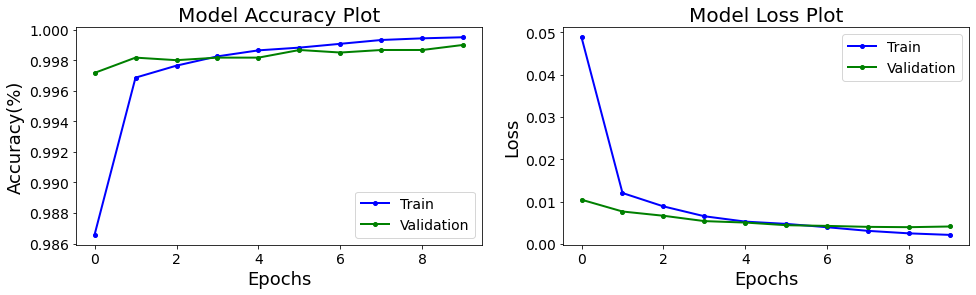

Confusion Matrix Plot
188/188 [==============================] - 2s 10ms/step
[[2993    7]
 [   1 2999]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3000
           1       1.00      1.00      1.00      3000

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



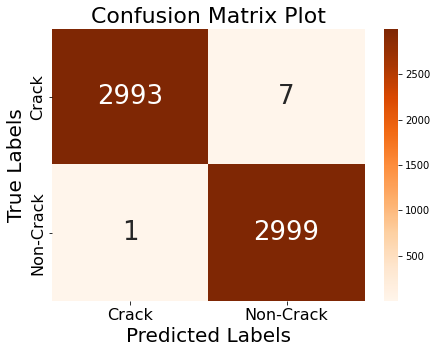

In [ ]:
#Graphs
from matplotlib import pyplot as plt

#Model Accuracy And Loss Plots
print("Model Accuracy And Loss Plots")
plt.figure(figsize=(16., 4.))
plt.subplots_adjust(hspace=0.4)
ax = plt.subplot(1, 2, 1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
  #label.set_fontname('Arial')
  label.set_fontsize(14)
plt.plot(history['accuracy'], color='blue', marker='o', linewidth=2, markersize=4) #color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=12
plt.plot(history['val_accuracy'], color='green', marker='o', linewidth=2, markersize=4)
plt.title('Model Accuracy Plot', size=20)
plt.ylabel('Accuracy(%)', size=18)
plt.xlabel('Epochs', size=18)
plt.legend(['Train', 'Validation'], loc='lower right', prop={'size': 14})
#plt.axis([-0.5, 40.5, -0.03, 1.03])
#plt.grid(True)

ax = plt.subplot(1, 2, 2)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
  #label.set_fontname('Arial')
  label.set_fontsize(14)
plt.plot(history['loss'], color='blue', marker='o', linewidth=2, markersize=4)
plt.plot(history['val_loss'], color='green', marker='o', linewidth=2, markersize=4)
plt.title('Model Loss Plot', size=20)
plt.ylabel('Loss', size=18)
plt.xlabel('Epochs', size=18)
plt.legend(['Train', 'Validation'], loc='upper right', prop={'size': 14})
#plt.axis([-0.5, 40.5, -0.06, 2.56])
#plt.grid(True)

plt.show()
#Model Accuracy And Loss Plot


#Confusion Matrix
print("Confusion Matrix Plot")
from sklearn.metrics import confusion_matrix, classification_report
y_true = fn.np.argmax(y_test, axis=1)
predict_x = model.predict(x_test)
y_pred = np.argmax(predict_x, axis=1)

cf_matrix = confusion_matrix(y_true, y_pred)
print(cf_matrix)
classification_report = classification_report(y_true, y_pred)
print(classification_report)

import seaborn as sns
import pandas as pd
classes = ['Crack', 'Non-Crack']
cf_matrix_df = pd.DataFrame(cf_matrix,
                            index = classes,
                            columns = classes)

fig, ax = plt.subplots(1, 1, figsize=(7, 5))
heatmap = sns.heatmap(cf_matrix_df, annot=True, fmt="d", cmap=plt.cm.Oranges, annot_kws={'size': 26, 'rotation': 0}, ax=ax)
heatmap.set_xticklabels(heatmap.get_xticklabels(), size=16, rotation=0)
heatmap.set_yticklabels(heatmap.get_yticklabels(), size=16, rotation=90)
plt.title('Confusion Matrix Plot', size=22)
plt.ylabel('True Labels', size=20)
plt.xlabel('Predicted Labels', size=20)
plt.show()
#Confusion Matrix

### **2) DenseNet169_CutLayer**

**Improved (LayerTruncation: DeductedBlock=1, CutPointLayer=conv4_block32_concat (None, 6, 6, 1280))**

In [ ]:
#Transfer Learning
#----------------
transfer_model = DenseNet169(
    include_top=False,
    weights='imagenet',
    input_tensor=model_input
    )

for layer in transfer_model.layers:
  layer.trainable = False

#for BatchNormalization in transfer_model.layers:
#  BatchNormalization.trainable = False

new_model = transfer_model.layers[-231].output

# Add New Layers
new_model = Conv2D(384, (1, 1), padding='valid', activation='relu')(new_model)
new_model = BatchNormalization()(new_model)
new_model = MaxPool2D(3, 3)(new_model)
new_model = Dropout(0.25)(new_model)

new_model = GlobalAveragePooling2D()(new_model)
#new_model = Dense(64, activation='relu')(new_model)
#new_model = Dropout(0.20)(new_model)
new_model = Dense(2, activation='sigmoid')(new_model)

#Combine Models
model = Model(inputs=transfer_model.input, outputs=new_model)
model.summary()
#----------------
#Transfer Learning


print("Train: ", x_train.shape, ", Val: ", x_val.shape, ", Test: ", x_test.shape)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss="binary_crossentropy",
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose=1,
                    validation_data=(x_val, y_val)
                   )

model.save('ModelTrainingResults/BuildingConcreteSurfaceCrack_DenseNet169_CutLayer.h5')
fn.np.save('ModelTrainingResults/BuildingConcreteSurfaceCrack_DenseNet169_CutLayer.npy', history.history)

51877672/51877672 [==============================] - 2s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 102, 102, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 48, 48, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 48, 48, 64)   256         ['conv1/conv[0][0]']             
                             

In [ ]:
print("[INFO] Calculating model accuracy")
print("Test Dataset: ", x_test.shape)
scores = model.evaluate(x_test, y_test)
print(scores)
print(f"Final Test Loss: {scores[0]}")
print(f"Final Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
Test Dataset:  (6000, 96, 96, 3)
188/188 [==============================] - 5s 26ms/step - loss: 0.0049 - accuracy: 0.9987
[0.004907893482595682, 0.9986666440963745]
Final Test Loss: 0.004907893482595682
Final Test Accuracy: 99.86666440963745


In [ ]:
model = fn.keras.models.load_model("ModelTrainingResults/BuildingConcreteSurfaceCrack_DenseNet169_CutLayer.h5")
history = fn.np.load('ModelTrainingResults/BuildingConcreteSurfaceCrack_DenseNet169_CutLayer.npy', allow_pickle='TRUE').item()

Model Accuracy And Loss Plots


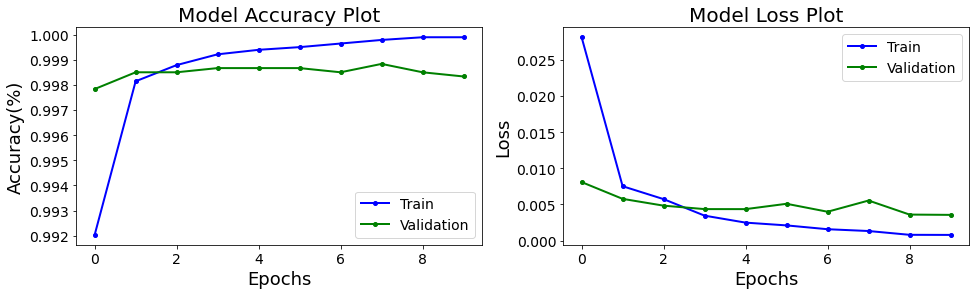

Confusion Matrix Plot
188/188 [==============================] - 6s 23ms/step
[[2995    5]
 [   3 2997]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3000
           1       1.00      1.00      1.00      3000

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



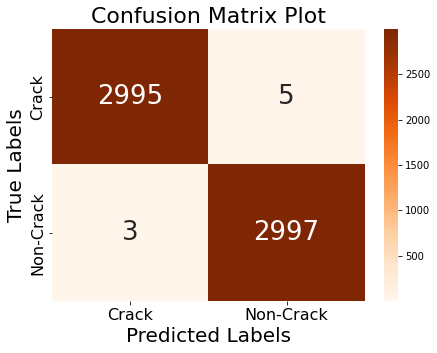

In [ ]:
#Graphs
from matplotlib import pyplot as plt

#Model Accuracy And Loss Plots
print("Model Accuracy And Loss Plots")
plt.figure(figsize=(16., 4.))
plt.subplots_adjust(hspace=0.4)
ax = plt.subplot(1, 2, 1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
  #label.set_fontname('Arial')
  label.set_fontsize(14)
plt.plot(history['accuracy'], color='blue', marker='o', linewidth=2, markersize=4) #color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=12
plt.plot(history['val_accuracy'], color='green', marker='o', linewidth=2, markersize=4)
plt.title('Model Accuracy Plot', size=20)
plt.ylabel('Accuracy(%)', size=18)
plt.xlabel('Epochs', size=18)
plt.legend(['Train', 'Validation'], loc='lower right', prop={'size': 14})
#plt.axis([-0.5, 40.5, -0.03, 1.03])
#plt.grid(True)

ax = plt.subplot(1, 2, 2)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
  #label.set_fontname('Arial')
  label.set_fontsize(14)
plt.plot(history['loss'], color='blue', marker='o', linewidth=2, markersize=4)
plt.plot(history['val_loss'], color='green', marker='o', linewidth=2, markersize=4)
plt.title('Model Loss Plot', size=20)
plt.ylabel('Loss', size=18)
plt.xlabel('Epochs', size=18)
plt.legend(['Train', 'Validation'], loc='upper right', prop={'size': 14})
#plt.axis([-0.5, 40.5, -0.06, 2.56])
#plt.grid(True)

plt.show()
#Model Accuracy And Loss Plot


#Confusion Matrix
print("Confusion Matrix Plot")
from sklearn.metrics import confusion_matrix, classification_report
y_true = fn.np.argmax(y_test, axis=1)
predict_x = model.predict(x_test)
y_pred = np.argmax(predict_x, axis=1)

cf_matrix = confusion_matrix(y_true, y_pred)
print(cf_matrix)
classification_report = classification_report(y_true, y_pred)
print(classification_report)

import seaborn as sns
import pandas as pd
classes = ['Crack', 'Non-Crack']
cf_matrix_df = pd.DataFrame(cf_matrix,
                            index = classes,
                            columns = classes)

fig, ax = plt.subplots(1, 1, figsize=(7, 5))
heatmap = sns.heatmap(cf_matrix_df, annot=True, fmt="d", cmap=plt.cm.Oranges, annot_kws={'size': 26, 'rotation': 0}, ax=ax)
heatmap.set_xticklabels(heatmap.get_xticklabels(), size=16, rotation=0)
heatmap.set_yticklabels(heatmap.get_yticklabels(), size=16, rotation=90)
plt.title('Confusion Matrix Plot', size=22)
plt.ylabel('True Labels', size=20)
plt.xlabel('Predicted Labels', size=20)
plt.show()
#Confusion Matrix

# **3) Mobile-DenseNet (Fusion)**

In [ ]:
DCNN_A = 'DCNN_A'
DCNN_B = 'DCNN_B'

In [ ]:
# MobileNetV2

transfer_model_a = DCNN_A + '_transfer_model'

#Transfer Learning
#----------------
def transfer_model_a(model_input):
    transfer_model_a = MobileNetV2(
        include_top=False,
        weights='imagenet',
        input_tensor=model_input
    )
    
    #Partial Layer Freezing
    for layer in transfer_model_a.layers:
      layer.trainable = False
    
    for layer in transfer_model_a.layers:
      layer._name = layer.name + '_' + DCNN_A
    
    #for BatchNormalization in transfer_model_a.layers:
    #  BatchNormalization.trainable = False

    new_model = transfer_model_a.layers[-48].output
    
    #Add New Layers (Auxiliary Fusing Layer (AuxFL))
    new_model = Conv2D(384, (1, 1), padding='valid', activation='relu')(new_model)
    new_model = BatchNormalization()(new_model)
    new_model = MaxPool2D(3, 3)(new_model)
    new_model = Dropout(0.25)(new_model)

    #Combine Models
    model = Model(inputs=transfer_model_a.input, outputs=new_model, name=DCNN_A)
    return model
#----------------
#Transfer Learning

#Initialize The Model
dcnn_a = transfer_model_a(model_input)
dcnn_a.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "DCNN_A"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1_DCNN_A (InputLayer)    [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 Conv1_DCNN_A (Conv2D)          (None, 48, 48, 32)   864         ['input_1_DCNN_A[0][0]']         
                                                                                                  
 bn_Conv1_DCNN_A (BatchNormaliz  (None, 48, 48, 32)  128         ['Conv1_DCNN_A[0][0]']           
 ation)                                                                                           
                                                                                                  
 Conv1_relu_DCNN_A (ReLU)     

In [ ]:
# DenseNet169

transfer_model_b = DCNN_B + '_transfer_model'

#Transfer Learning
#----------------
def transfer_model_b(model_input):
    transfer_model_b = DenseNet169(
        include_top=False,
        weights='imagenet',
        input_tensor=model_input
    )
    
    #Partial Layer Freezing
    for layer in transfer_model_b.layers:
      layer.trainable = False
    
    for layer in transfer_model_b.layers:
      layer._name = layer.name + '_' + DCNN_B
    
    #for BatchNormalization in transfer_model_b.layers:
    #  BatchNormalization.trainable = False

    new_model = transfer_model_b.layers[-231].output
    
    # Add New Layers (Auxiliary Fusing Layer (AuxFL))
    new_model = Conv2D(384, (1, 1), padding='valid', activation='relu')(new_model)
    new_model = BatchNormalization()(new_model)
    new_model = MaxPool2D(3, 3)(new_model)
    new_model = Dropout(0.25)(new_model)

    # Combine Models
    model = Model(inputs=transfer_model_b.input, outputs=new_model, name=DCNN_B)
    return model
#----------------
#Transfer Learning

#Initialize The Model
dcnn_b = transfer_model_b(model_input)
dcnn_b.summary()

51877672/51877672 [==============================] - 3s 0us/step
Model: "DCNN_B"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1_DCNN_A_DCNN_B (InputLa  [(None, 96, 96, 3)]  0          []                               
 yer)                                                                                             
                                                                                                  
 zero_padding2d_DCNN_B (ZeroPad  (None, 102, 102, 3)  0          ['input_1_DCNN_A_DCNN_B[0][0]']  
 ding2D)                                                                                          
                                                                                                  
 conv1/conv_DCNN_B (Conv2D)     (None, 48, 48, 64)   9408        ['zero_padding2d_DCNN_B[0][0]']  
                            

In [ ]:
# Re-Initialize For Fusion
dcnn_a = transfer_model_a(model_input)
dcnn_b = transfer_model_b(model_input)

# Fuse The Models Into A Single Pipeline
models = [dcnn_a, 
          dcnn_b]

print("Fusion success!")
print("Ready to connect with its ending layers!")

Fusion success!
Ready to connect with its ending layers!


In [ ]:
#Build the Fusion

def mobile_dense_net_builder(models, model_input):
    outputs = [m.output for m in models]
    
    # Initial Fusion Layer
    new_model_initial = Add(name='InitialFusionLayer')(outputs)

    # Add New Layers
    new_model = Conv2D(384, (1, 1), padding='valid', activation='relu')(new_model_initial)
    new_model = BatchNormalization()(new_model)
    #new_model = MaxPool2D(2, 2)(new_model)
    #new_model = Dropout(0.25)(new_model)

    new_model_merge = Add(name='Fusion')([new_model_initial, new_model])
    
    # Fine-Tuning
    new_model = GlobalAveragePooling2D()(new_model_merge)
    new_model = Dense(96, activation='relu')(new_model)
    new_model = Dropout(0.25)(new_model)
    new_model = Dense(2, activation='sigmoid', name='Sigmoid_Classifier_Mobile_DenseNet')(new_model)

    # Combine Models
    model = Model(model_input, new_model, name='Mobile_DenseNet')
    return model

#Istantitate the model and report the summary
model = mobile_dense_net_builder(models, model_input)
model.summary()


print("Train: ", x_train.shape, ", Val: ", x_val.shape, ", Test: ", x_test.shape)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss="binary_crossentropy",
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose=1,
                    validation_data=(x_val, y_val)
                   )

model.save('ModelTrainingResults/BuildingConcreteSurfaceCrack_Mobile-DenseNet.h5')
fn.np.save('ModelTrainingResults/BuildingConcreteSurfaceCrack_Mobile-DenseNet.npy', history.history)

Model: "Mobile_DenseNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1_DCNN_A_DCNN_B_DCNN_A_D  [(None, 96, 96, 3)]  0          []                               
 CNN_B (InputLayer)                                                                               
                                                                                                  
 zero_padding2d_2_DCNN_B (ZeroP  (None, 102, 102, 3)  0          ['input_1_DCNN_A_DCNN_B_DCNN_A_DC
 adding2D)                                                       NN_B[0][0]']                     
                                                                                                  
 conv1/conv_DCNN_B (Conv2D)     (None, 48, 48, 64)   9408        ['zero_padding2d_2_DCNN_B[0][0]']
                                                                                    

In [ ]:
print("[INFO] Calculating model accuracy")
print("Test Dataset: ", x_test.shape)
scores = model.evaluate(x_test, y_test)
print(scores)
print(f"Final Test Loss: {scores[0]}")
print(f"Final Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
Test Dataset:  (6000, 96, 96, 3)
188/188 [==============================] - 7s 34ms/step - loss: 0.0064 - accuracy: 0.9987
[0.006409769877791405, 0.9986666440963745]
Final Test Loss: 0.006409769877791405
Final Test Accuracy: 99.86666440963745


In [ ]:
model = fn.keras.models.load_model("ModelTrainingResults/BuildingConcreteSurfaceCrack_Mobile-DenseNet.h5")
history = fn.np.load('ModelTrainingResults/BuildingConcreteSurfaceCrack_Mobile-DenseNet.npy', allow_pickle='TRUE').item()

Model Accuracy And Loss Plots


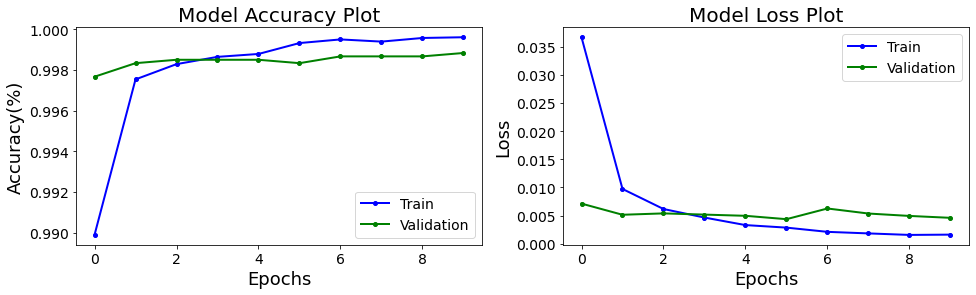

Confusion Matrix Plot
188/188 [==============================] - 9s 29ms/step
[[2995    5]
 [   3 2997]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3000
           1       1.00      1.00      1.00      3000

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



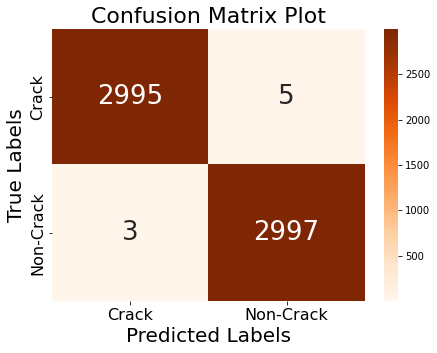

In [ ]:
#Graphs
from matplotlib import pyplot as plt

#Model Accuracy And Loss Plots
print("Model Accuracy And Loss Plots")
plt.figure(figsize=(16., 4.))
plt.subplots_adjust(hspace=0.4)
ax = plt.subplot(1, 2, 1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
  #label.set_fontname('Arial')
  label.set_fontsize(14)
plt.plot(history['accuracy'], color='blue', marker='o', linewidth=2, markersize=4) #color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=12
plt.plot(history['val_accuracy'], color='green', marker='o', linewidth=2, markersize=4)
plt.title('Model Accuracy Plot', size=20)
plt.ylabel('Accuracy(%)', size=18)
plt.xlabel('Epochs', size=18)
plt.legend(['Train', 'Validation'], loc='lower right', prop={'size': 14})
#plt.axis([-0.5, 40.5, -0.03, 1.03])
#plt.grid(True)

ax = plt.subplot(1, 2, 2)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
  #label.set_fontname('Arial')
  label.set_fontsize(14)
plt.plot(history['loss'], color='blue', marker='o', linewidth=2, markersize=4)
plt.plot(history['val_loss'], color='green', marker='o', linewidth=2, markersize=4)
plt.title('Model Loss Plot', size=20)
plt.ylabel('Loss', size=18)
plt.xlabel('Epochs', size=18)
plt.legend(['Train', 'Validation'], loc='upper right', prop={'size': 14})
#plt.axis([-0.5, 40.5, -0.06, 2.56])
#plt.grid(True)

plt.show()
#Model Accuracy And Loss Plot


#Confusion Matrix
print("Confusion Matrix Plot")
from sklearn.metrics import confusion_matrix, classification_report
y_true = fn.np.argmax(y_test, axis=1)
predict_x = model.predict(x_test)
y_pred = np.argmax(predict_x, axis=1)

cf_matrix = confusion_matrix(y_true, y_pred)
print(cf_matrix)
classification_report = classification_report(y_true, y_pred)
print(classification_report)

import seaborn as sns
import pandas as pd
classes = ['Crack', 'Non-Crack']
cf_matrix_df = pd.DataFrame(cf_matrix,
                            index = classes,
                            columns = classes)

fig, ax = plt.subplots(1, 1, figsize=(7, 5))
heatmap = sns.heatmap(cf_matrix_df, annot=True, fmt="d", cmap=plt.cm.Oranges, annot_kws={'size': 26, 'rotation': 0}, ax=ax)
heatmap.set_xticklabels(heatmap.get_xticklabels(), size=16, rotation=0)
heatmap.set_yticklabels(heatmap.get_yticklabels(), size=16, rotation=90)
plt.title('Confusion Matrix Plot', size=22)
plt.ylabel('True Labels', size=20)
plt.xlabel('Predicted Labels', size=20)
plt.show()
#Confusion Matrix